In [1]:
#pip install requests

In [2]:
import pandas as pd
import numpy as np

#import requests
#from bs4 import BeautifulSoup

# For plotting
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
df = pd.read_json('amenities-vancouver.json.gz', lines=True)

In [4]:
# Collecting all restaurant-related ammenities
df = df[(df['amenity']=='cafe') | (df['amenity']=='restaurant') |
       (df['amenity']=='fast_food') | (df['amenity']== 'ice_cream') |
       (df['amenity']== 'bbq') | (df['amenity']== 'food_court') |
       (df['amenity']== 'bar') | (df['amenity']== 'juice_bar')]

In [5]:
#df.to_csv('restaurants.csv')

In [6]:
# For plotting purposes
crs = {'init':'epsg:4326'}
bc_street_map = gpd.read_file('british-columbia-latest-free.shp')
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
#df

/Users/jeanette/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
# For searching purposes
df['tags'] = df['tags'].astype(str)
df['name'] = df['name'].str.lower()

In [8]:
# Filter restaurants that have a Wikipedia page into chain restaurants
chains = df[df['tags'].str.contains('wikidata')]

In [9]:
# Remove chain restaurants from the 'unsorted' DataFrame
unsorted = df[~df['tags'].str.contains('wikidata')]

# Create a list of chain restaurants that we have collected so far
chains_list = chains['name'].tolist()

# Search for these chains again (because some of them do not have the Wikipedia tag)
chains2 = unsorted.loc[unsorted['name'].isin(chains_list)]

# Append
chains = chains.append(chains2)
#chains.to_csv('chains.csv')
#chains

In [10]:
# Remove new chain restaurants from the 'unsorted' DataFrame
unsorted = unsorted.loc[~unsorted['name'].isin(chains_list)]
#unsorted.to_csv('unsorted.csv')
#unsorted

In [11]:
#I tried to scrape a few wikipedia pages but failed... so I made a text file instead

#URL = 'https://en.wikipedia.org/wiki/List_of_fast-food_chains_in_Canada'
#page = requests.get(URL)
#soup = BeautifulSoup(page.content, 'html.parser')
#results = soup.find(id='mw-content-text')
#results
#for p in results.select('a'):
    #if p['title'] == 'Pizza Hut':
        #print(p.text)

In [12]:
# Text file with new list of Canadian chains
canadian_chains = pd.read_csv('canadian_chains.txt', header = None, sep="/n")
canadian_chains = pd.DataFrame(np.array(canadian_chains), columns =['chain name'], index=None)
canadian_chains['chain name'] = canadian_chains['chain name'].str.lower()

# Search for new chains & append
chains3 = unsorted.loc[unsorted['name'].isin(canadian_chains['chain name'])]
chains = chains.append(chains3)
chains.to_csv('chains.csv')
chains

/Users/jeanette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,lat,lon,timestamp,amenity,name,tags,geometry
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",POINT (-123.12574 49.26081)
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,tim hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",POINT (-123.18079 49.19358)
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,tim hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",POINT (-122.84838 49.22840)
54,49.212449,-122.919749,2019-07-02T01:10:30.000-07:00,cafe,tim hortons,"{'brand:wikidata': 'Q175106', 'website': 'http...",POINT (-122.91975 49.21245)
55,49.212659,-122.919347,2019-07-02T01:10:30.000-07:00,cafe,starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",POINT (-122.91935 49.21266)
...,...,...,...,...,...,...,...
17524,49.219668,-122.655749,2020-04-17T18:17:31.000-07:00,restaurant,chopped leaf,"{'addr:province': 'BC', 'addr:housenumber': '2...",POINT (-122.65575 49.21967)
17533,49.136320,-122.889941,2020-03-25T17:28:16.000-07:00,cafe,de dutch,{},POINT (-122.88994 49.13632)
17585,49.286882,-123.142093,2019-10-28T15:41:35.000-07:00,restaurant,milestones,"{'addr:housenumber': '1210', 'website': 'https...",POINT (-123.14209 49.28688)
17644,49.025522,-123.067520,2020-04-28T00:17:48.000-07:00,restaurant,chopped leaf,"{'addr:province': 'BC', 'addr:housenumber': '1...",POINT (-123.06752 49.02552)


In [13]:
# Remove new chain restaurants from the 'unsorted' DataFrame
unsorted = unsorted.loc[~unsorted['name'].isin(canadian_chains['chain name'])]
unsorted.to_csv('unsorted.csv')
unsorted

,lat,lon,timestamp,amenity,name,tags,geometry
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,salad loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,POINT (-123.12570 49.26095)
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{},POINT (-122.95971 49.24985)
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,best bite indian cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",POINT (-123.18247 49.12665)
58,49.171276,-123.134873,2019-10-27T17:08:25.000-07:00,restaurant,oriental rice noodle,"{'addr:housenumber': '8100', 'phone': '+1-604-...",POINT (-123.13487 49.17128)
87,49.155671,-123.124897,2017-08-19T05:05:34.000-07:00,bar,legends pub,{},POINT (-123.12490 49.15567)
...,...,...,...,...,...,...,...
17701,49.262659,-123.251745,2019-11-04T20:07:41.000-08:00,cafe,magma cafè,"{'wheelchair': 'yes', 'addr:housenumber': '633...",POINT (-123.25174 49.26266)
17710,49.273230,-122.792985,2013-03-25T23:57:07.000-07:00,restaurant,NaN,{'cuisine': 'japanese'},POINT (-122.79299 49.27323)
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,house of dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-...",POINT (-123.07626 49.25041)
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,creekside coffee,{},POINT (-122.80670 49.27842)


In [14]:
bc_street_map = gpd.read_file('british-columbia-latest-free.shp')

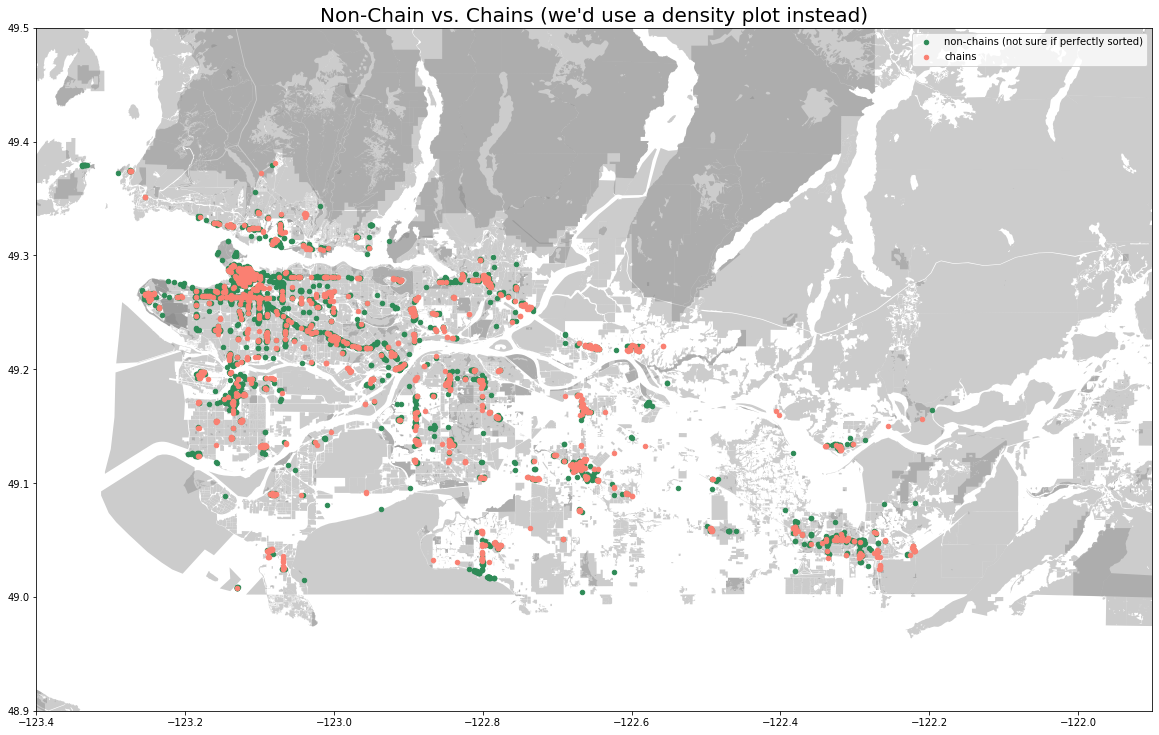

In [15]:
fig,ax = plt.subplots(figsize = (20,20))
bc_street_map.plot(ax=ax, alpha=0.4, color='grey')
ax.set_xlim(-123.4,-121.9)
ax.set_ylim(48.9,49.5)
ax.set_title("Non-Chain vs. Chains (we'd use a density plot instead)", fontsize=20)
unsorted.plot(ax=ax,markersize=20,color="seagreen",marker="o",label="non-chains (not sure if perfectly sorted)")
chains.plot(ax=ax,markersize=20,color="salmon",marker="o",label="chains")
plt.legend(prop={'size':10})